#### Sales_revenue prediction. 
#### Here we will find which attribute(advertisment mode) is influencing the most to increse the sales.
#### And then we will make regression line or predictor 
#### Following are the steps:-

### 1.  importing libraries:-


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

##### This advertising dataset has the details of sales revenue generated with respect to advertisment spends across multiple channels like radio,tv and news paper.

In [30]:
advert=pd.read_csv("Advertising.csv")
advert.head()

,TV,Radio,Newspaper,Sales,unnamed
0,230.1,37.8,69.2,22.1,NaN
1,44.5,39.3,45.1,10.4,NaN
2,17.2,45.9,69.3,12.0,NaN
3,151.5,41.3,58.5,16.5,NaN
4,180.8,10.8,58.4,17.9,NaN


In [26]:
# To view details of rows and columns of dataset:-
advert.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales  unnamed
0    230.1   37.8       69.2   22.1      NaN
1     44.5   39.3       45.1   10.4      NaN
2     17.2   45.9       69.3   12.0      NaN
3    151.5   41.3       58.5   16.5      NaN
4    180.8   10.8       58.4   17.9      NaN
..     ...    ...        ...    ...      ...
195   38.2    3.7       13.8    7.6      NaN
196   94.2    4.9        8.1   14.0      NaN
197  177.0    9.3        6.4   14.8      NaN
198  283.6   42.0       66.2   25.5      NaN
199  232.1    8.6        8.7   18.4      NaN

[200 rows x 5 columns]>

#### 2.Removing extra  column if present (only if needed)

In [27]:
#check first
advert.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales', 'unnamed'], dtype='object')

In [33]:
#'axis' is for column /and/ "inplace" is for replace the dataset
advert.drop(['unnamed'],axis=1,inplace=True)
advert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### 3.  Exploratory Data Analysis (EDA)

In [34]:
import seaborn as sns

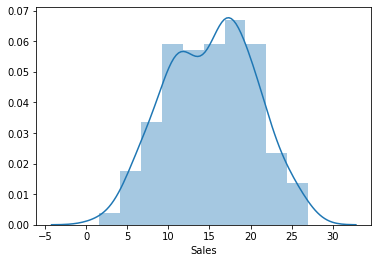

In [36]:
sns.distplot(advert.Sales)

#### Sales value is distributed normally, i.e higher and lower values are equally available. it means mean(average) can tell right story

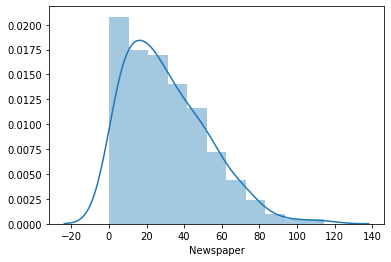

In [38]:
sns.distplot(advert.Newspaper)

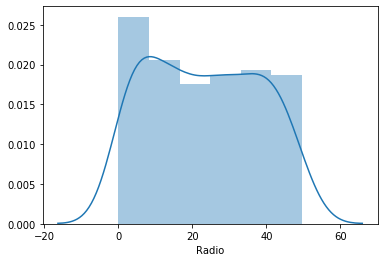

In [39]:
sns.distplot(advert.Radio)

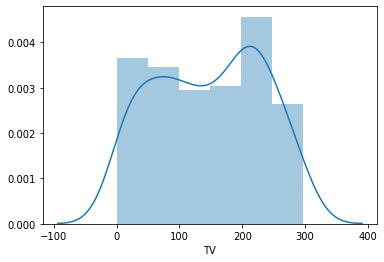

In [41]:
sns.distplot(advert.TV)

#### Task 5: Exploring Relationships between pridictor and response

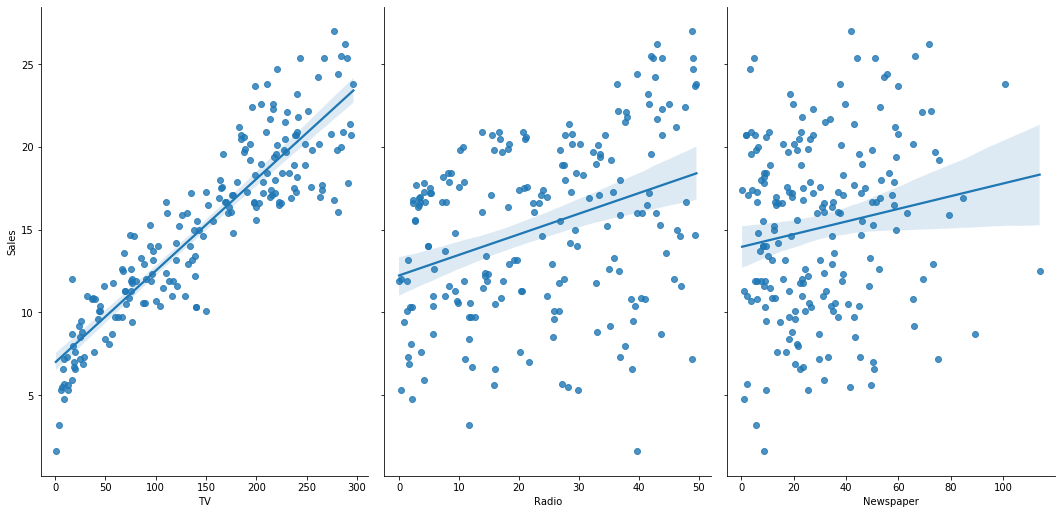

In [50]:
sns.pairplot(advert,x_vars=['TV','Radio','Newspaper'], y_vars='Sales',height=7,aspect=0.7,kind='reg')

###### *** from the avobe plot its clear that TV and Sales are the most corelated

In [51]:
advert.TV.corr(advert.Sales)

0.9012079133023306

In [53]:
advert.corr()


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


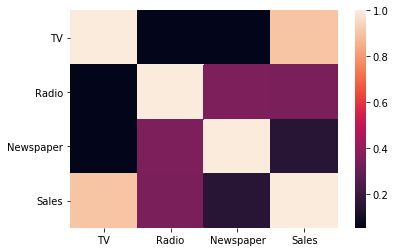

In [54]:
# Heat Map
sns.heatmap(advert.corr())

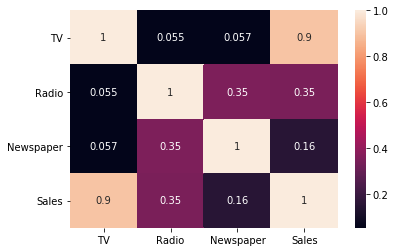

In [57]:
# Heat Map with anotation
sns.heatmap(advert.corr(),annot=True)

### Task 5: Creating the simple Linear Regression Model

In [59]:
X=advert[['TV']]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [62]:
print(type(X))

print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [71]:
Y=advert.Sales

# just for information:-
print(type(Y))

print(Y.shape)

Y.head()

<class 'pandas.core.series.Series'>
(200,)


0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [76]:
# importing train_test_split function
from sklearn.model_selection import train_test_split 

# spliting dataset 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1)

In [77]:
# to see shape. just for information
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(150, 1)
(50, 1)
(150,)
(50,)


In [88]:
from sklearn.linear_model import LinearRegression 

lr=LinearRegression()

lr.fit(X_train,Y_train)


LinearRegression()

### Task 6:Interpreting Model coefficients

In [95]:
print(lr.intercept_)
print(lr.coef_)

6.902718095764661
[0.05565473]


### Task 7:Making Pridictions with our Model

In [97]:
y_pred=lr.predict(X_test)

y_pred[:5]

array([18.63473515, 18.17280089, 12.22887574, 22.4971734 , 21.02788853])

###### avobe these are the prediction and need to be checked for the acuracy, which we will see below

### Task 8: Model Evaluation Metrics

In [100]:
#### 1.Mean abolute error 2.Mean squared error 3. Root mean squared error(RMSE). All three can be used for caculating errors
#### we need to import metrics package/module
from sklearn import metrics


print(np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

2.2564722695411006


#### here the RMSE is very less i.e error is very low which claims that the model is good one